In [31]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

In [32]:
data = pd.read_csv("dataset/raw_data.csv", index_col= False)
data.head()

,date,time,epoch,moteid,temp,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [33]:
data.isnull().sum()

date            0
time            0
epoch           0
moteid        526
temp          901
humidity      902
light       93878
voltage       526
dtype: int64

In [34]:
data.dropna(inplace= True)

In [35]:
data[['epoch', 'moteid','temp','humidity','light','voltage']] = data[['epoch', 'moteid','temp','humidity','light','voltage']].astype(float)
data['timestamp'] = data[['date', 'time']].apply(lambda x: ' '.join(x.astype(str)), axis=1)
data.describe()

,epoch,moteid,temp,humidity,light,voltage
count,2.219803e+06,2.219803e+06,2.219803e+06,2.219803e+06,2.219803e+06,2.219803e+06
mean,3.301138e+04,2.847831e+01,3.923349e+01,3.373195e+01,4.072112e+02,2.490634e+00
std,1.838041e+04,1.503397e+01,3.742116e+01,1.724057e+01,5.394277e+02,1.784080e-01
min,0.000000e+00,1.000000e+00,-3.840000e+01,-8.983130e+03,0.000000e+00,9.100830e-03
25%,1.757500e+04,1.700000e+01,2.045880e+01,3.184240e+01,3.956000e+01,2.385220e+00
50%,3.329200e+04,2.900000e+01,2.246780e+01,3.921230e+01,1.582400e+02,2.527320e+00
75%,4.776500e+04,4.100000e+01,2.697580e+01,4.348570e+01,5.372800e+02,2.627960e+00
max,6.553500e+04,5.800000e+01,3.855680e+02,1.375120e+02,1.847360e+03,3.159150e+00


In [36]:
del data['date']
del data['time']

In [37]:
data.timestamp = pd.to_datetime(data.timestamp)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219803 entries, 0 to 2313152
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   epoch      float64       
 1   moteid     float64       
 2   temp       float64       
 3   humidity   float64       
 4   light      float64       
 5   voltage    float64       
 6   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 135.5 MB


In [38]:
data.to_csv('dataset/eda.csv', index= False)

In [63]:
data = pd.read_csv('dataset/eda.csv', parse_dates=['timestamp'], index_col='timestamp')

In [64]:
data = data[(data["moteid"] >= 1) & (data["moteid"] <= 54)]



In [65]:
def data_3min (df):

    # Sort the DataFrame by index
    df = df.sort_index()

    # resample data to 3 minute intervals
    df = df.resample('3T').mean()

    # remove rows with negative values
    df = df[(df >= 0).all(1)]

    df.dropna(inplace=True)


    return df

In [66]:
data_3min= data_3min(data)

In [67]:
def normalize_data(df):   

    # normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

    df.dropna(inplace=True)


    return df

In [68]:
data= normalize_data(data_3min)

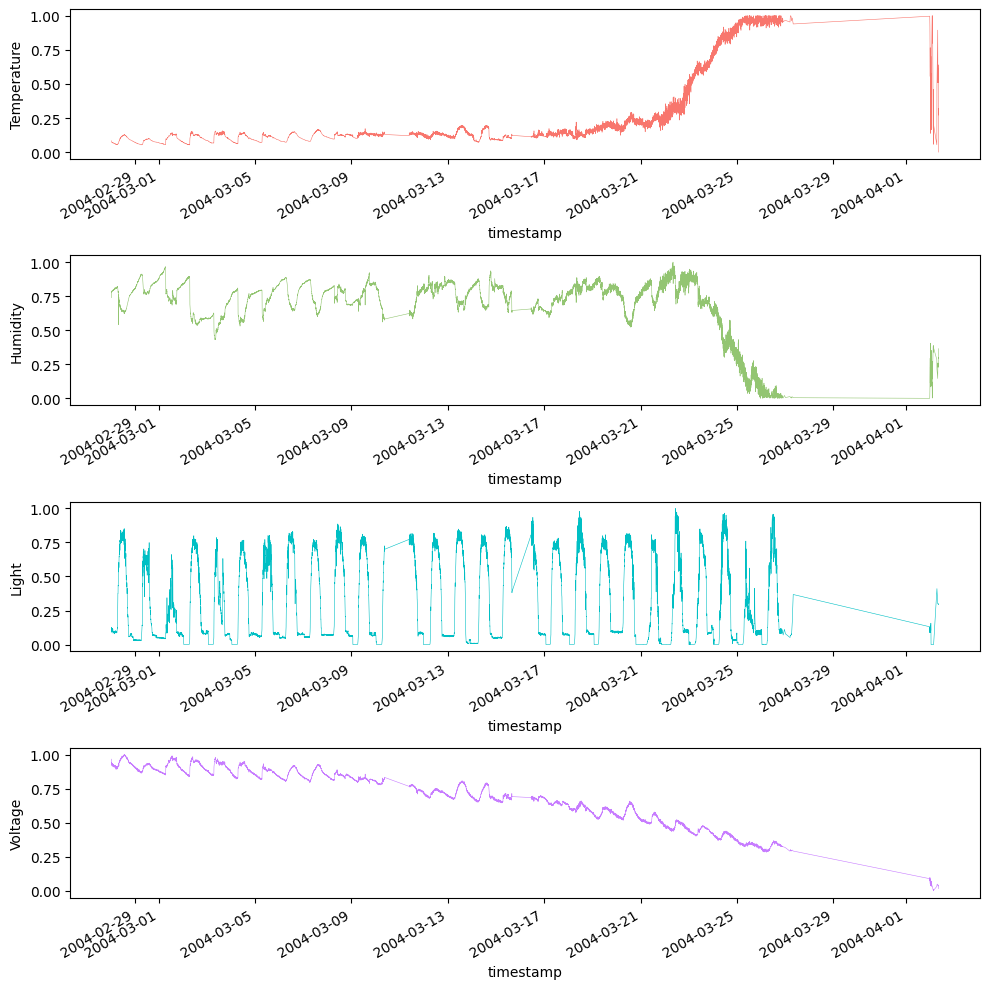

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#F8766D', '#93C572', '#00BFC4', '#C77CFF']

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,10))

data['temp'].plot(ax=axes[0], linewidth=0.4, color=colors[0])
axes[0].set_ylabel('Temperature')

data['humidity'].plot(ax=axes[1], linewidth=0.4, color=colors[1])
axes[1].set_ylabel('Humidity')

data['light'].plot(ax=axes[2], linewidth=0.4, color=colors[2])
axes[2].set_ylabel('Light')

data['voltage'].plot(ax=axes[3], linewidth=0.4, color=colors[3])
axes[3].set_ylabel('Voltage')

plt.tight_layout()
plt.show()


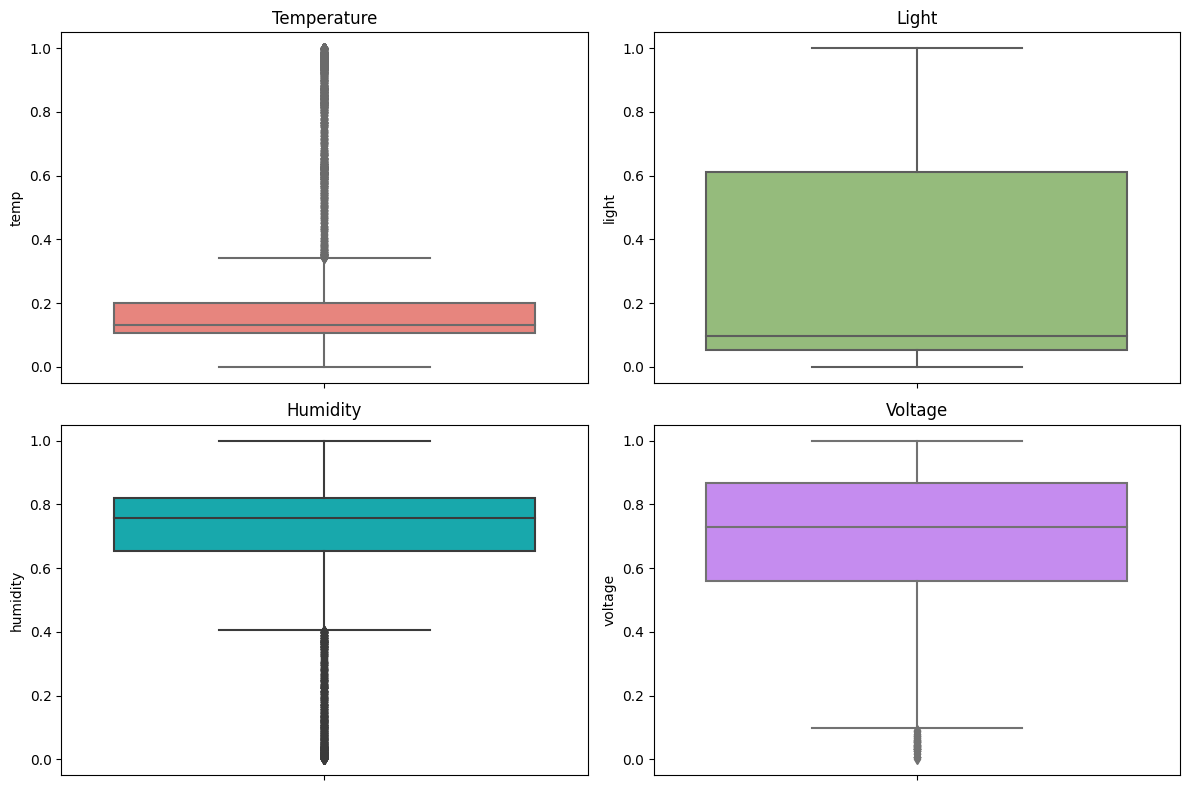

In [70]:
# create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
colors = ['#F8766D', '#93C572', '#00BFC4', '#C77CFF']
# create a boxplot for temperature on the top left subplot
sns.boxplot(y='temp', color=colors[0], data=data, ax=axes[0, 0])
axes[0, 0].set_title('Temperature')

# create a boxplot for light on the top right subplot
sns.boxplot(y='light', color=colors[1], data=data, ax=axes[0, 1])
axes[0, 1].set_title('Light')

# create a boxplot for humidity on the bottom left subplot
sns.boxplot(y='humidity', color=colors[2], data=data, ax=axes[1, 0])
axes[1, 0].set_title('Humidity')

# create a boxplot for voltage on the bottom right subplot
sns.boxplot(y='voltage', color=colors[3], data=data, ax=axes[1, 1])
axes[1, 1].set_title('Voltage')

plt.tight_layout()
plt.show()

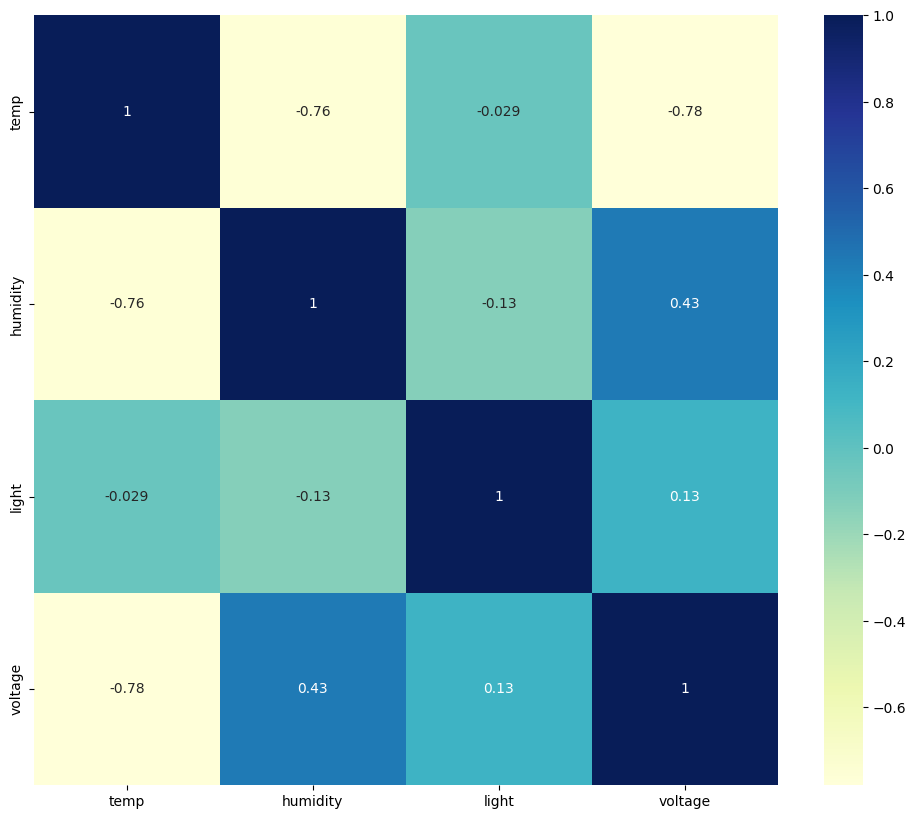

In [71]:
corr_mat_p = data[['temp','humidity','light','voltage']].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_mat_p, annot=True, cmap='YlGnBu')
plt.show()

In [72]:
print(corr_mat_p)

              temp  humidity     light   voltage
temp      1.000000 -0.761260 -0.029165 -0.779956
humidity -0.761260  1.000000 -0.127123  0.432046
light    -0.029165 -0.127123  1.000000  0.125882
voltage  -0.779956  0.432046  0.125882  1.000000


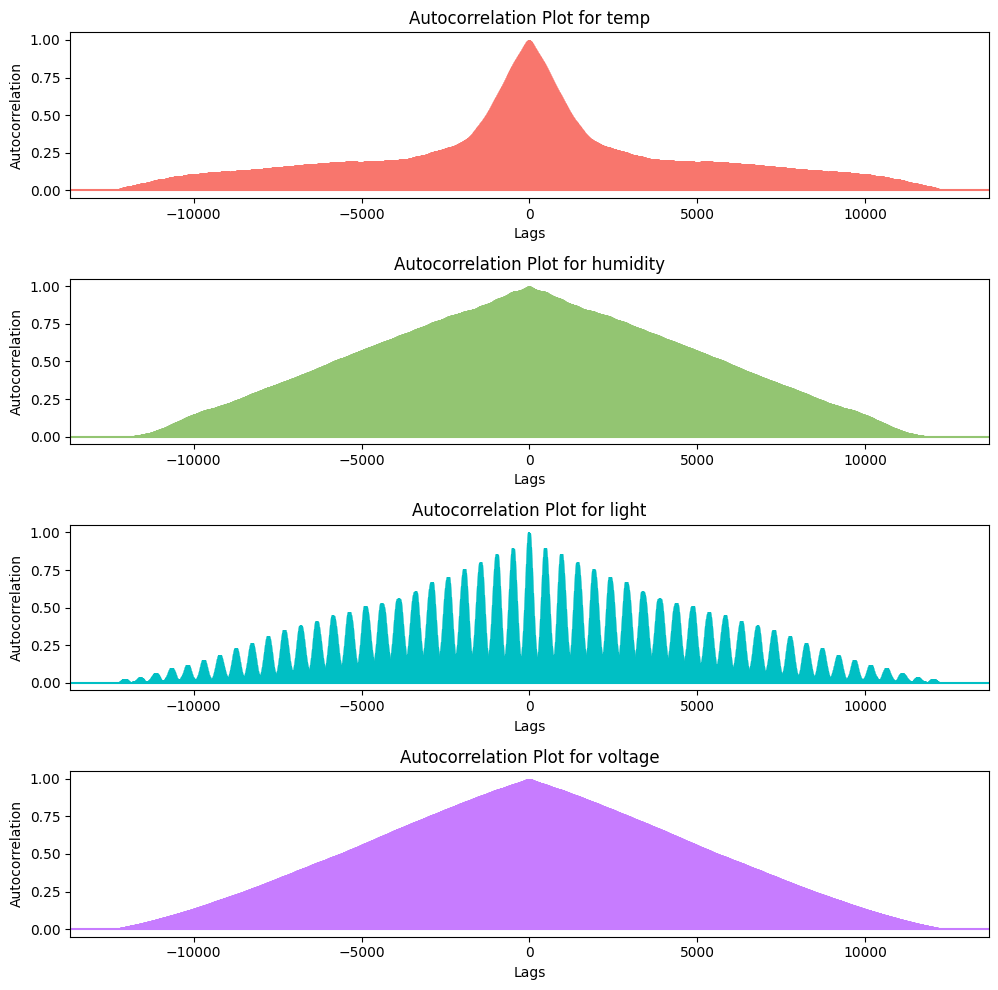

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the columns to plot
cols = ['temp', 'humidity', 'light', 'voltage']

# Create the autocorrelation plots for each column
fig, axes = plt.subplots(nrows=len(cols), figsize=(10,10))
colors = ['#F8766D', '#93C572', '#00BFC4', '#C77CFF']

for i, col in enumerate(cols):
    axes[i].acorr(data.loc[:, col], maxlags=len(data)-1, color=colors[i])
    axes[i].set_title(f'Autocorrelation Plot for {col}')
    axes[i].set_xlabel('Lags')
    axes[i].set_ylabel('Autocorrelation')

plt.tight_layout()
plt.show()


In [75]:
data = pd.read_csv('dataset/eda.csv', parse_dates=['timestamp'], index_col='timestamp')

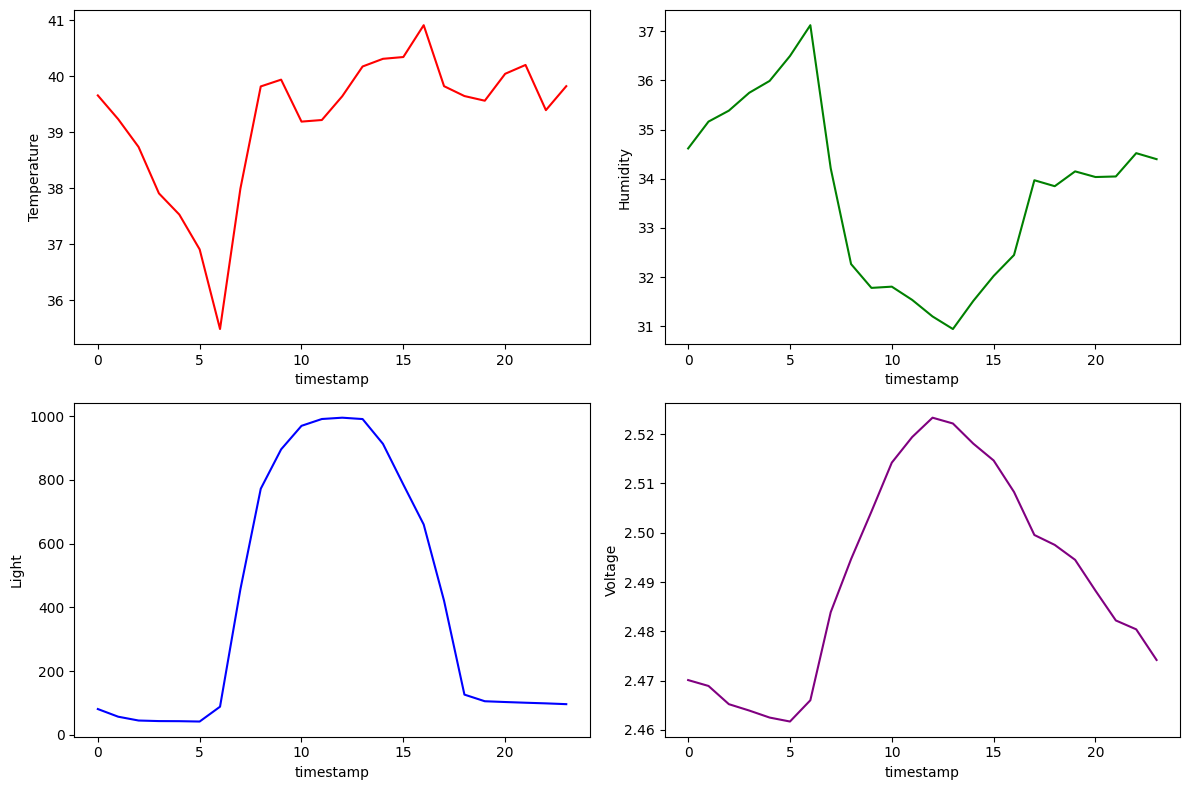

In [76]:
# group data by hour and calculate mean
index_hour = data.index.hour
df_by_hour = data.groupby(index_hour).mean()

# create a figure with 4 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# create a line plot for temperature on the first subplot
sns.lineplot(ax=axes[0,0], x=df_by_hour.index, y=df_by_hour['temp'], color='red')
axes[0,0].set_ylabel('Temperature')

# create a line plot for humidity on the second subplot
sns.lineplot(ax=axes[0,1], x=df_by_hour.index, y=df_by_hour['humidity'], color='green')
axes[0,1].set_ylabel('Humidity')

# create a line plot for light on the third subplot
sns.lineplot(ax=axes[1,0], x=df_by_hour.index, y=df_by_hour['light'], color='blue')
axes[1,0].set_ylabel('Light')

# create a line plot for voltage on the fourth subplot
sns.lineplot(ax=axes[1,1], x=df_by_hour.index, y=df_by_hour['voltage'], color='purple')
axes[1,1].set_ylabel('Voltage')

plt.tight_layout()
plt.show()

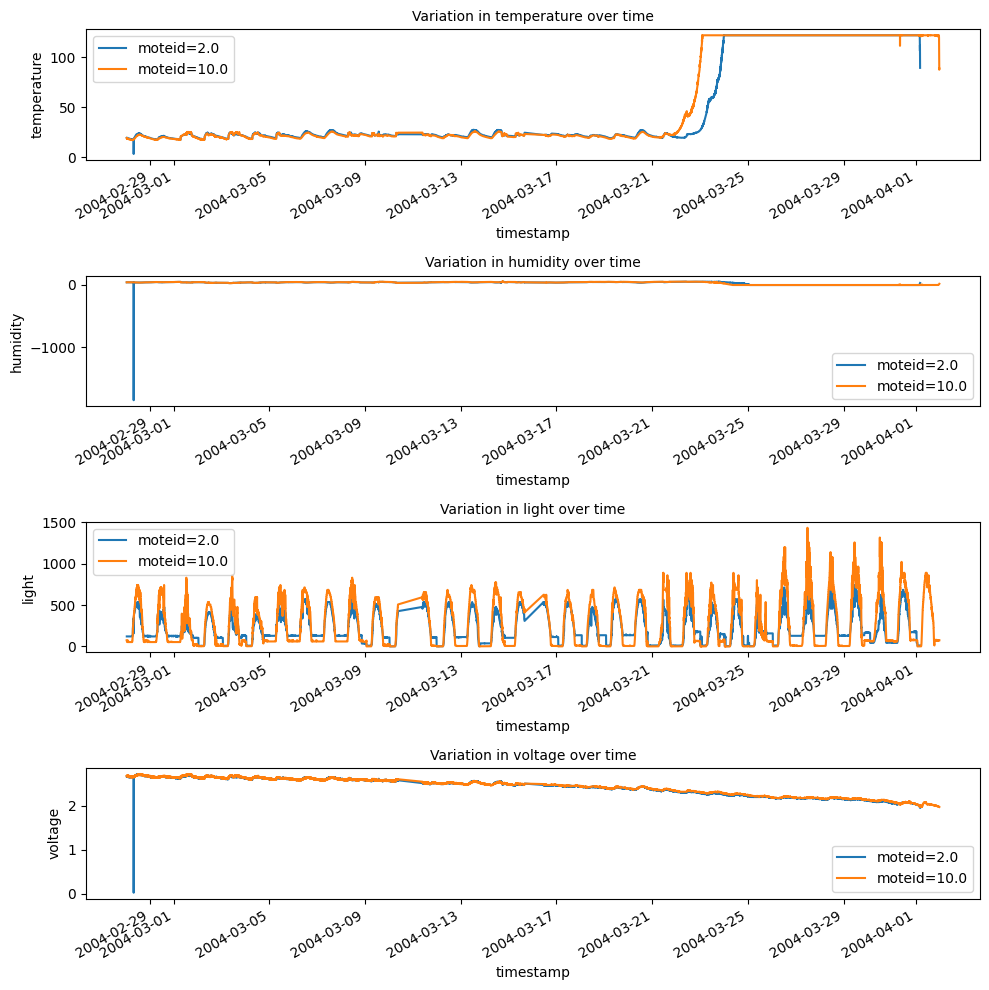

In [77]:
from matplotlib import pyplot as plt

# Filter data for moteid 2 and 10
d_m2 = data.loc[data['moteid'] == 2.0]
d_m10 = data.loc[data['moteid'] == 10.0]

# Create subplots for temperature, humidity, light, and voltage
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

# Plot temperature for moteid 2 and 10
d_m2['temp'].plot(ax=axs[0], label='moteid=2.0')
d_m10['temp'].plot(ax=axs[0], label='moteid=10.0')
axs[0].set_title('Variation in temperature over time', fontsize=10)
axs[0].set_xlabel('timestamp', fontsize=10)
axs[0].set_ylabel('temperature', fontsize=10)
axs[0].legend()

# Plot humidity for moteid 2 and 10
d_m2['humidity'].plot(ax=axs[1], label='moteid=2.0')
d_m10['humidity'].plot(ax=axs[1], label='moteid=10.0')
axs[1].set_title('Variation in humidity over time', fontsize=10)
axs[1].set_xlabel('timestamp', fontsize=10)
axs[1].set_ylabel('humidity', fontsize=10)
axs[1].legend()

# Plot light for moteid 2 and 10
d_m2['light'].plot(ax=axs[2], label='moteid=2.0')
d_m10['light'].plot(ax=axs[2], label='moteid=10.0')
axs[2].set_title('Variation in light over time', fontsize=10)
axs[2].set_xlabel('timestamp', fontsize=10)
axs[2].set_ylabel('light', fontsize=10)
axs[2].legend()

# Plot voltage for moteid 2 and 10
d_m2['voltage'].plot(ax=axs[3], label='moteid=2.0')
d_m10['voltage'].plot(ax=axs[3], label='moteid=10.0')
axs[3].set_title('Variation in voltage over time', fontsize=10)
axs[3].set_xlabel('timestamp', fontsize=10)
axs[3].set_ylabel('voltage', fontsize=10)
axs[3].legend()

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()
